# Project


In [1]:
#importing datasets and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#reading dataset 
data=pd.read_excel("desktop/pythonpro/Bank_Dataset.xlsx",'Data')
data.columns=["ID","Age","Experience","Income","ZIPCode","Family","CCAvg","Education","Mortgage","PersonalLoan","SecuritiesAccount","CDAccount","Online","CreditCard"]

In [3]:
#data imported
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
# Data summary: checking datatypes, shape
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 5000 non-null   int64  
 1   Age                5000 non-null   int64  
 2   Experience         5000 non-null   int64  
 3   Income             5000 non-null   int64  
 4   ZIPCode            5000 non-null   int64  
 5   Family             5000 non-null   int64  
 6   CCAvg              5000 non-null   float64
 7   Education          5000 non-null   int64  
 8   Mortgage           5000 non-null   int64  
 9   PersonalLoan       5000 non-null   int64  
 10  SecuritiesAccount  5000 non-null   int64  
 11  CDAccount          5000 non-null   int64  
 12  Online             5000 non-null   int64  
 13  CreditCard         5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


(5000, 14)

step2:
Checking if we need to clean the data for any of the variables

In [5]:
# checking null values
data.apply(lambda x: sum(x.isnull()))

ID                   0
Age                  0
Experience           0
Income               0
ZIPCode              0
Family               0
CCAvg                0
Education            0
Mortgage             0
PersonalLoan         0
SecuritiesAccount    0
CDAccount            0
Online               0
CreditCard           0
dtype: int64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
PersonalLoan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


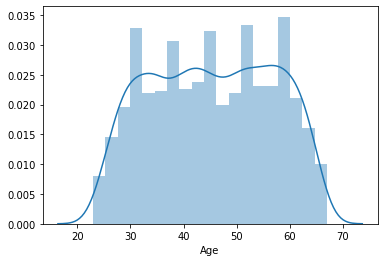

In [7]:
#data Visualization

sns.distplot(data["Age"] )

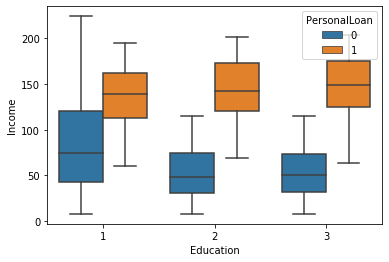

In [8]:
#Influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

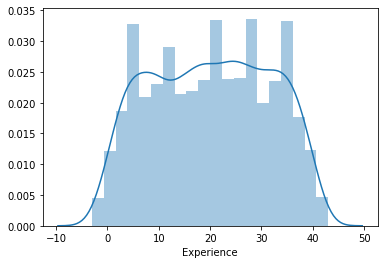

In [9]:
sns.distplot(data["Experience"])

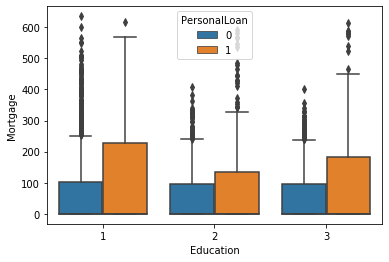

In [10]:
sns.boxplot(x="Education",y='Mortgage',hue="PersonalLoan",data=data)

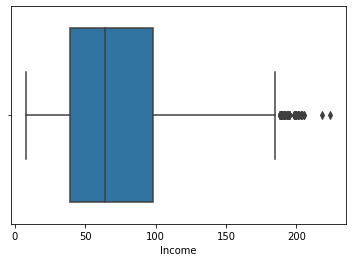

In [11]:
sns.boxplot(data["Income"])

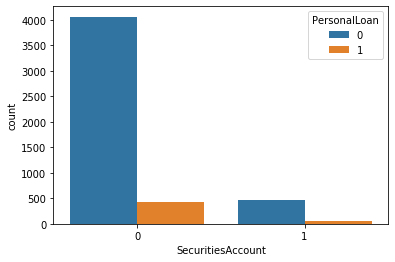

In [12]:
sns.countplot(x="SecuritiesAccount",data=data,hue="PersonalLoan")

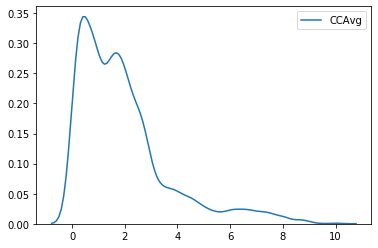

In [13]:
sns.kdeplot(data["CCAvg"])

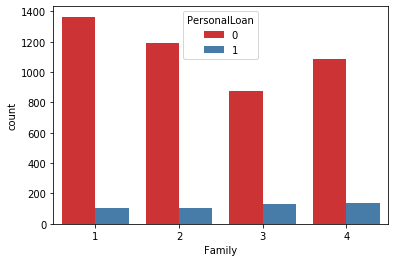

In [14]:
sns.countplot(x="Family",data=data,hue="PersonalLoan",palette='Set1')

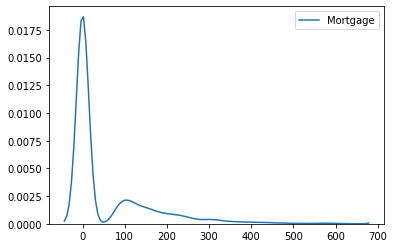

In [15]:
sns.kdeplot(data["Mortgage"])

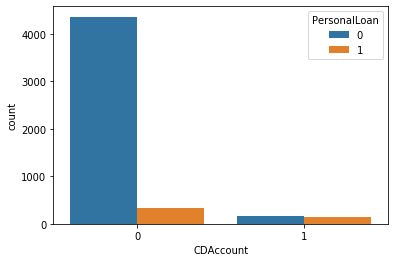

In [16]:
sns.countplot(x="CDAccount",data=data,hue="PersonalLoan")

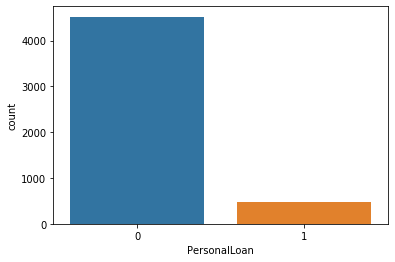

In [17]:
sns.countplot(data["PersonalLoan"])

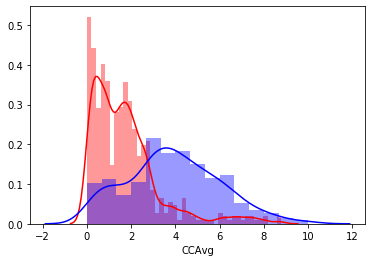

In [18]:
sns.distplot(data[data.PersonalLoan==0]["CCAvg"],color='r')
sns.distplot(data[data.PersonalLoan==1]["CCAvg"],color='b')

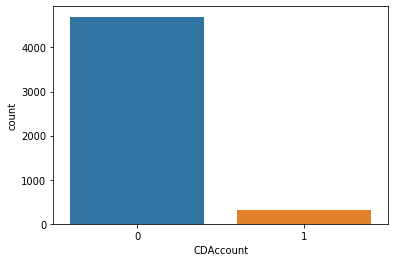

In [19]:
sns.countplot(data["CDAccount"])

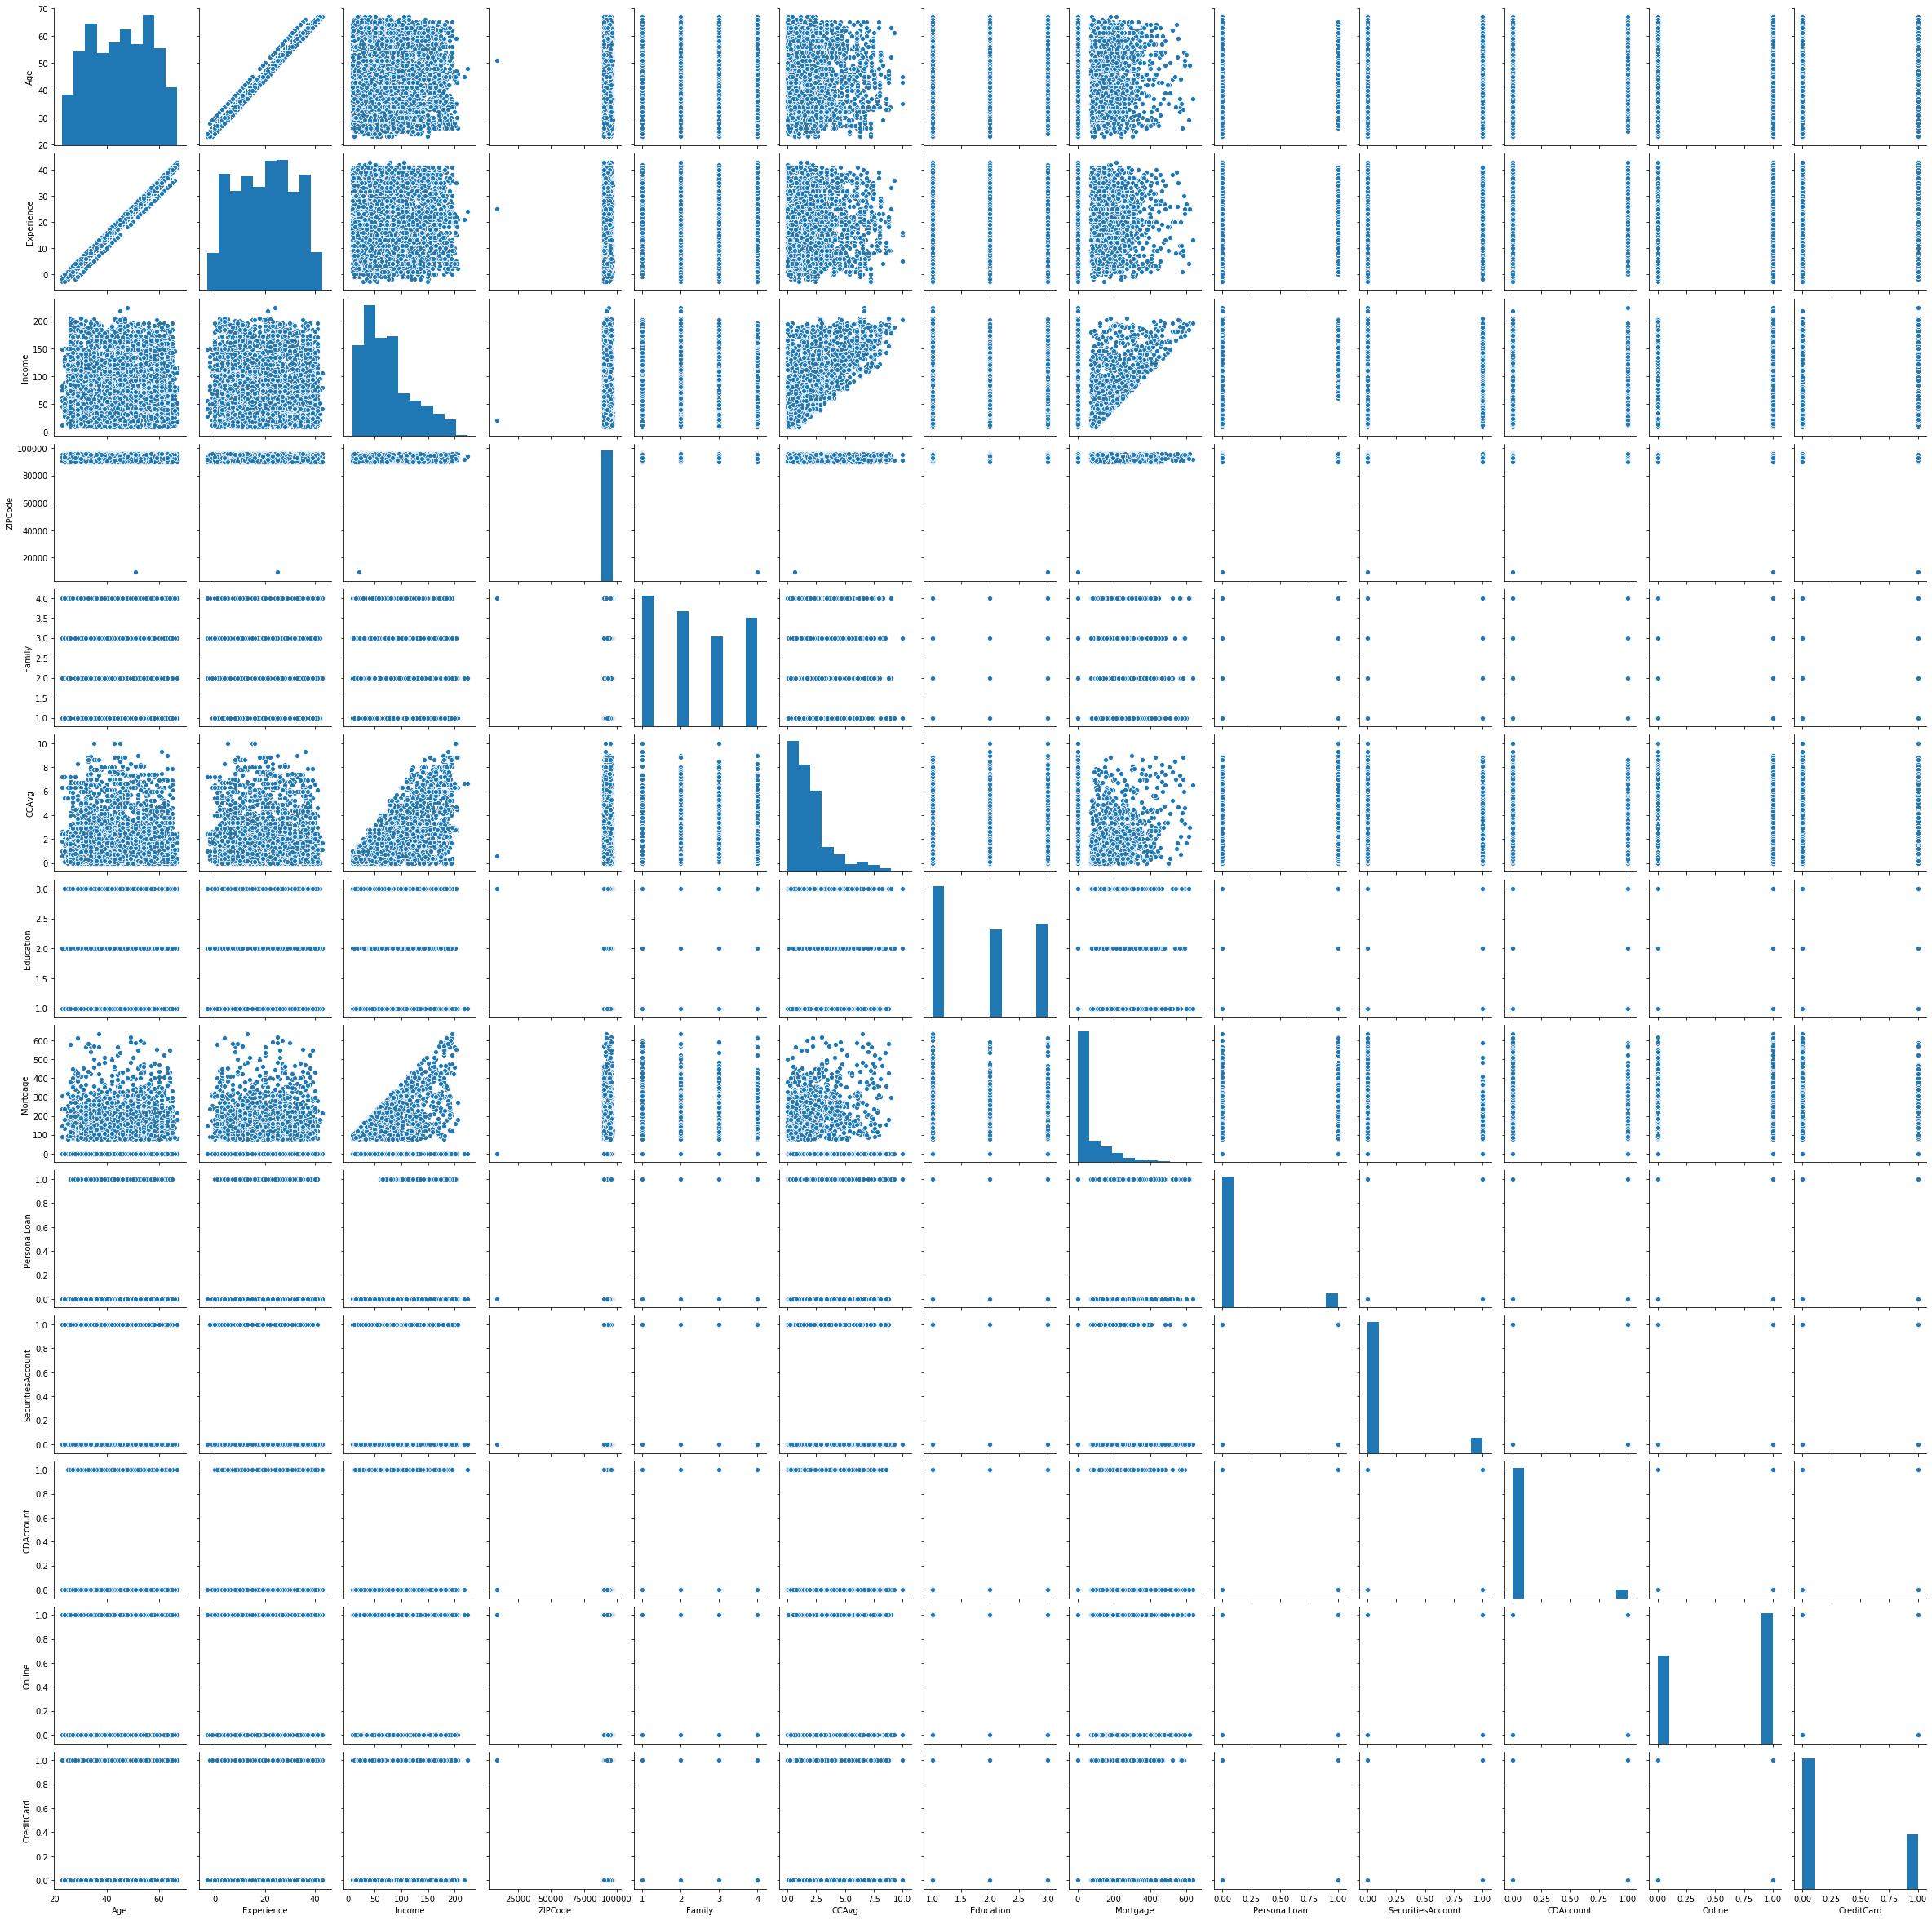

In [20]:
sns.pairplot(data.iloc[:,1:])

In [21]:
 #removing unnecessary data-removing missing data, faulty data
data[data['Experience']<0]['Experience'].count()

52

In [22]:
#replacing negative values with median
data['Experience'].replace( to_replace= -1,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -2,value = np.nan,inplace = True )
data['Experience'].replace( to_replace= -3,value = np.nan,inplace = True )

data['Experience'].isnull().sum()

52

In [23]:
# 52 values in experience are replaced with nan value. Now we will fill it with median values
data['Experience'].fillna(data['Experience'].median(),inplace=True)
data["Experience"]

0        1.0
1       19.0
2       15.0
3        9.0
4        8.0
        ... 
4995     3.0
4996     4.0
4997    39.0
4998    40.0
4999     4.0
Name: Experience, Length: 5000, dtype: float64

In [24]:
data[data['Experience']<0]['Experience'].count()

0

Information on the features or attributes

The attributes can be divided accordingly :

    The variable ID does not add any interesting information. There is no association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

    Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
    Securities Account - Does the customer have a securities account with the bank?
    CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
    Online - Does the customer use internet banking facilities?
    Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

    Age - Age of the customer
    Experience - Years of experience
    Income - Annual income in dollars
    CCAvg - Average credit card spending
    Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

    Family - Family size of the customer
    Education - education level of the customer

The nominal variable is :

    ID
    Zip Code



In [25]:
data.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
ID,1.000000,-0.008473,-0.009339,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.977182,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.009339,0.977182,1.000000,-0.049046,-0.028492,-0.045528,-0.048730,0.018074,-0.013365,-0.014013,-0.000465,0.005526,0.013459,0.008834
Income,-0.017695,-0.055269,-0.049046,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.013432,-0.029216,-0.028492,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.045528,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.048730,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.018074,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.013365,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
PersonalLoan,-0.024801,-0.007726,-0.014013,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [28]:
#step 3:a) checking unique columns
for each in data.columns:
    print(each)
    print(data[each].unique())
    print('---'*30)
   

ID
[   1    2    3 ... 4998 4999 5000]
------------------------------------------------------------------------------------------
Age
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]
------------------------------------------------------------------------------------------
Experience
[ 1. 19. 15.  9.  8. 13. 27. 24. 10. 39.  5. 23. 32. 41. 30. 14. 18. 21.
 28. 31. 11. 16. 20. 35.  6. 25.  7. 12. 26. 37. 17.  2. 36. 29.  3. 22.
 34.  0. 38. 40. 33.  4. 42. 43.]
------------------------------------------------------------------------------------------
Income
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24

In [30]:
#step3.b) Number of people with zero mortgage

data[data['Mortgage'] == 0]['Mortgage'].count()


3462

In [31]:
# step3 c) Number of people with zero credit card spendinng per month

data[data['CCAvg'] == 0]['CCAvg'].count()


106

In [37]:
#numerical data
numeric_data = data.select_dtypes(include=[np.number])
numeric_data.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [38]:
data['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [40]:
data['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

In [41]:
data['SecuritiesAccount'].value_counts()

0    4478
1     522
Name: SecuritiesAccount, dtype: int64

In [42]:
data['CDAccount'].value_counts()

0    4698
1     302
Name: CDAccount, dtype: int64

In [44]:
data['Online'].value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [47]:
data['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [49]:
"""
data.drop(columns ='Experience',inplace= True)
data.drop(columns ='ID',inplace=True)
data.head(2)
"""

"\ndata.drop(columns ='Experience',inplace= True)\ndata.drop(columns ='ID',inplace=True)\ndata.head(2)\n"

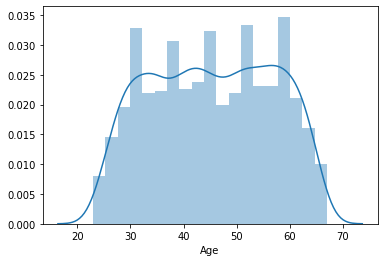

In [51]:
sns.distplot(data["Age"] )

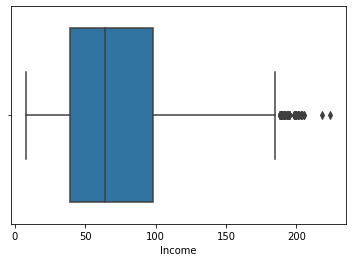

In [53]:
sns.boxplot(data["Income"])

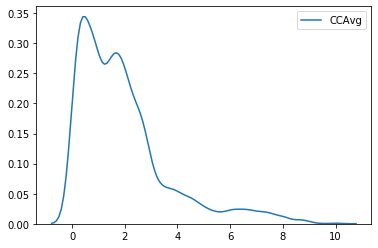

In [54]:
sns.kdeplot(data["CCAvg"])

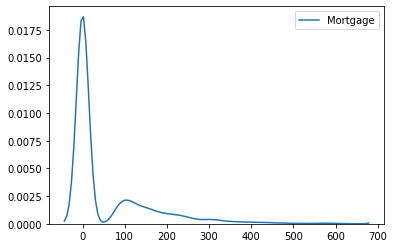

In [55]:
sns.kdeplot(data["Mortgage"])

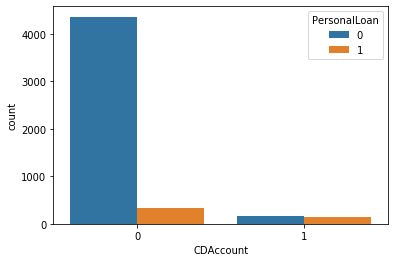

In [56]:
sns.countplot(x="CDAccount",data=data,hue="PersonalLoan")

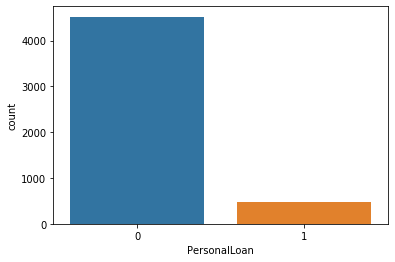

In [57]:
sns.countplot(data["PersonalLoan"])

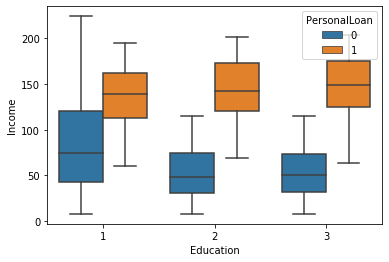

In [58]:
sns.boxplot(x='Education',y='Income',hue='PersonalLoan',data=data)

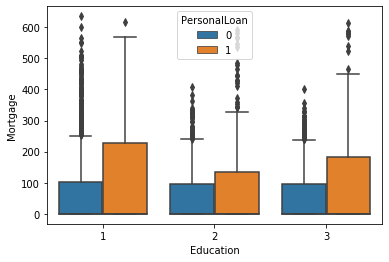

In [59]:
sns.boxplot(x="Education",y='Mortgage',hue="PersonalLoan",data=data)

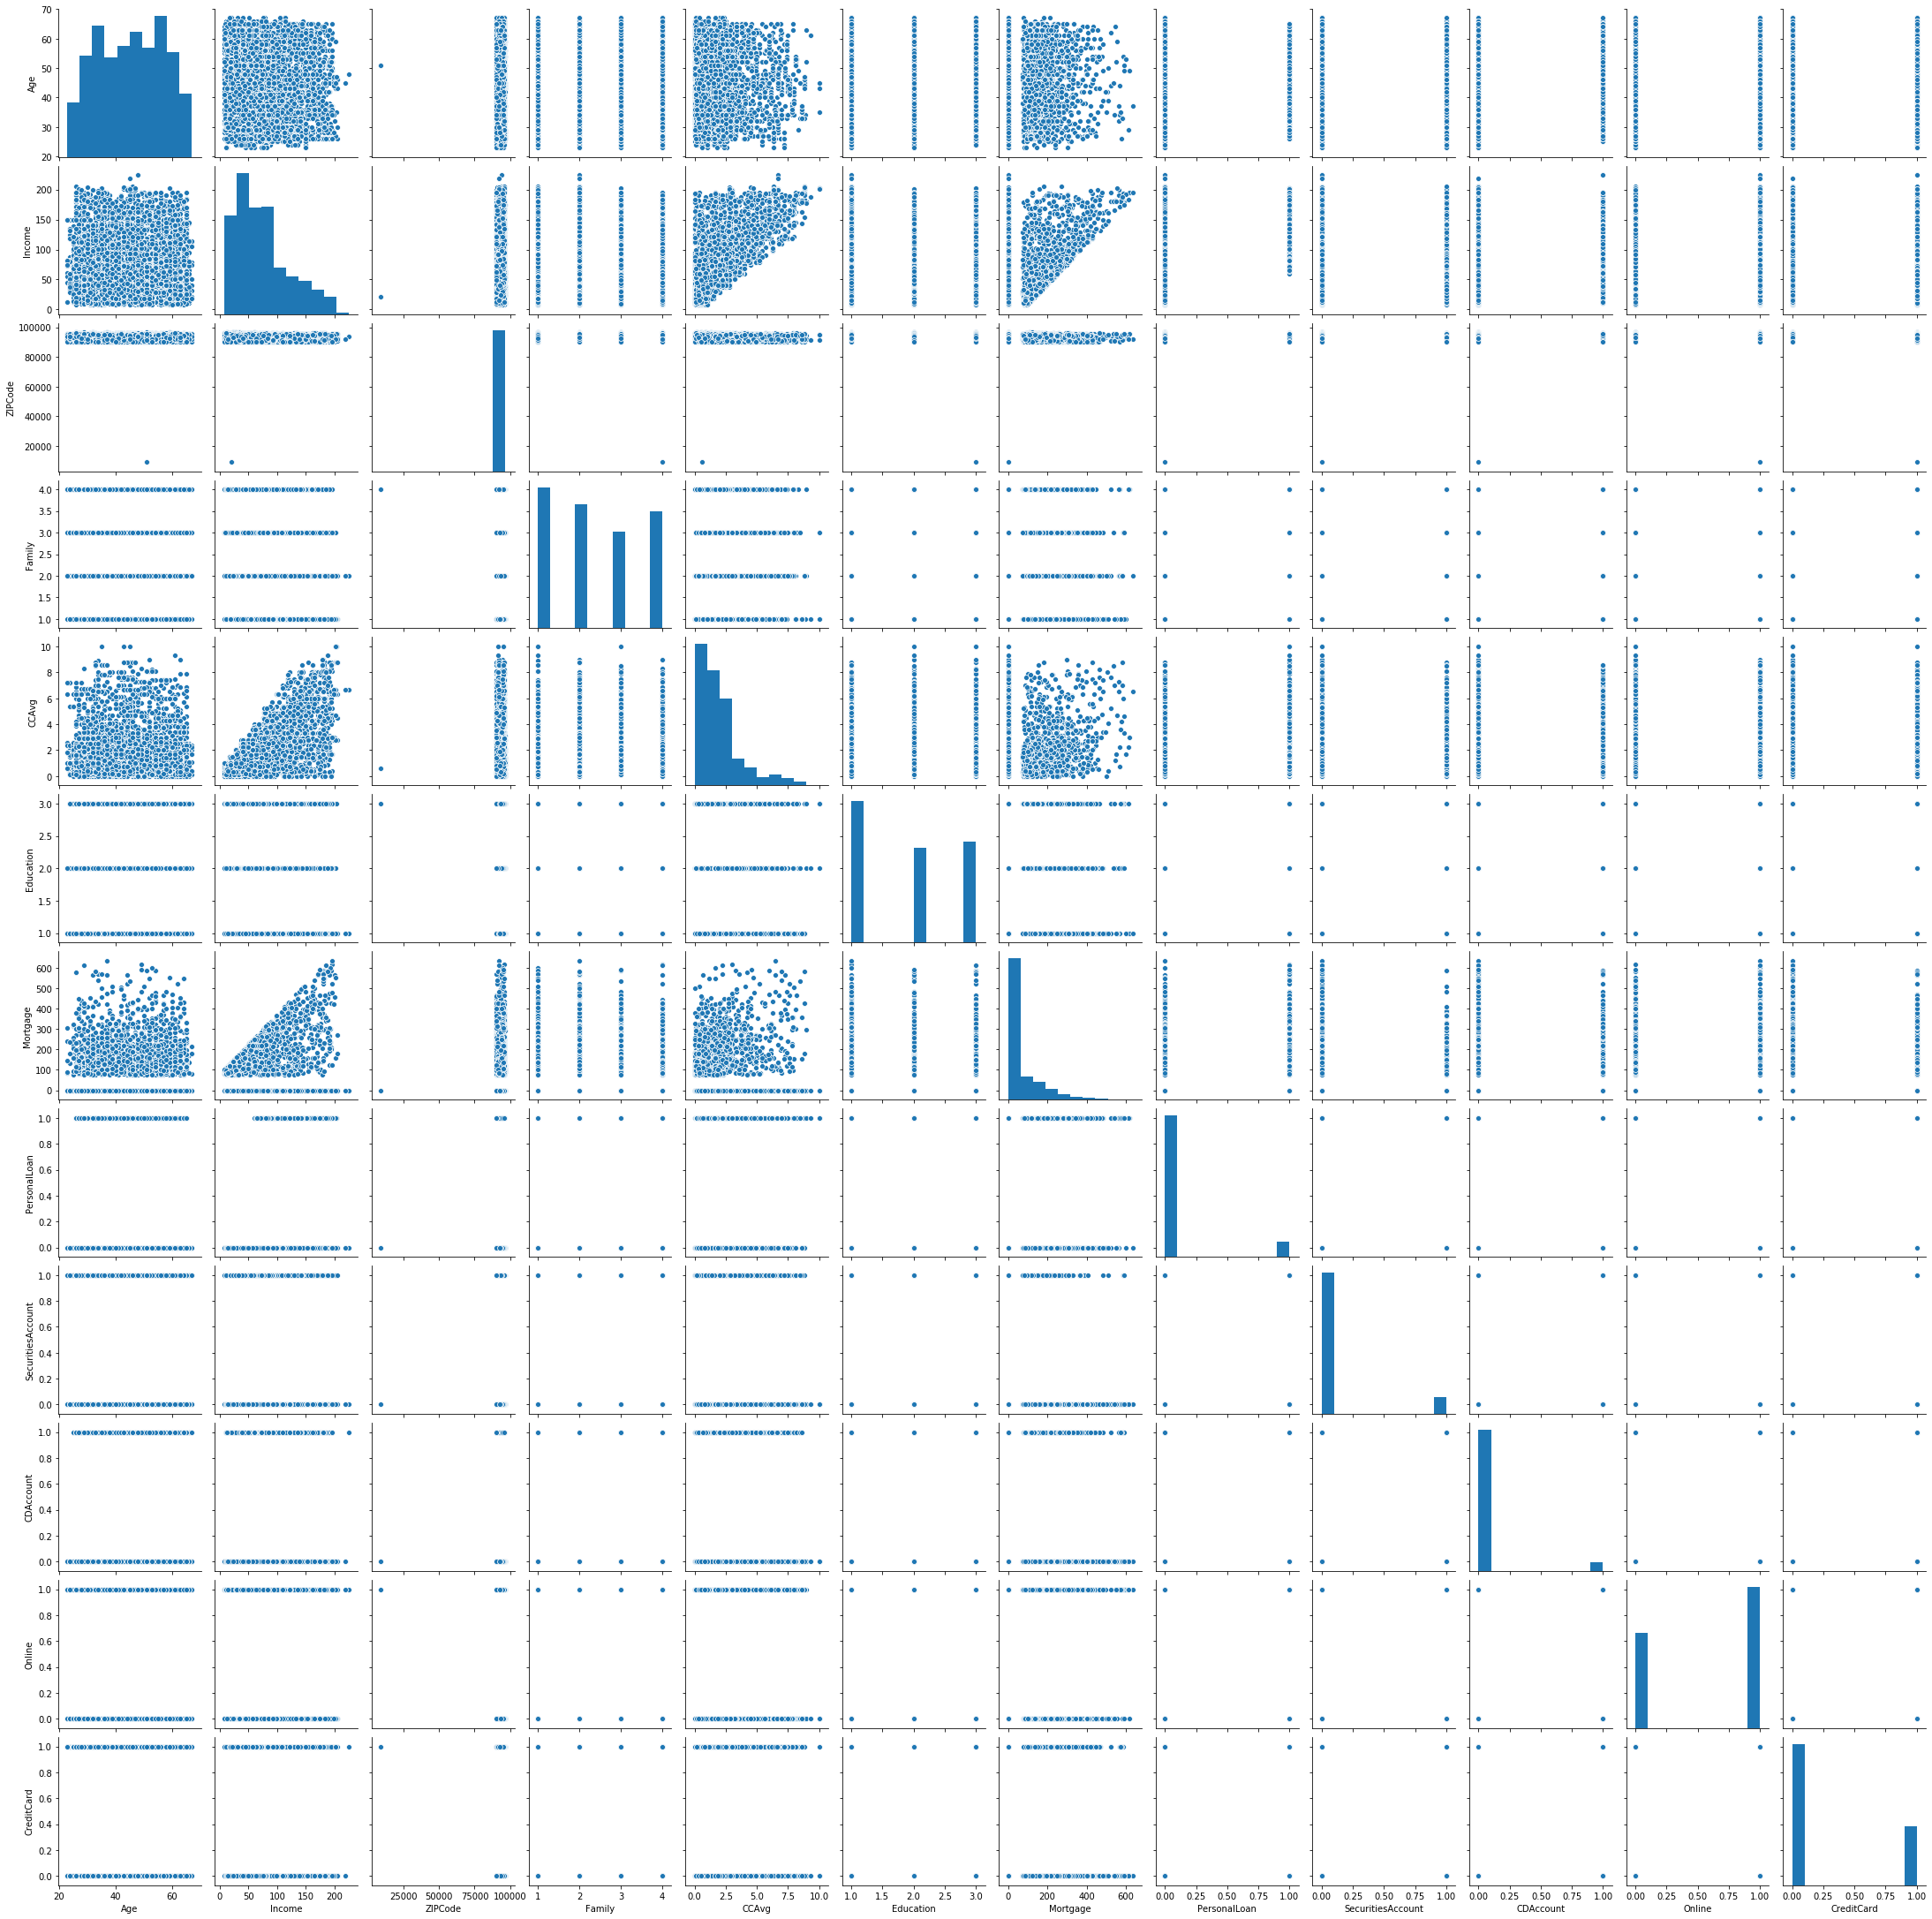

In [60]:
sns.pairplot(data)

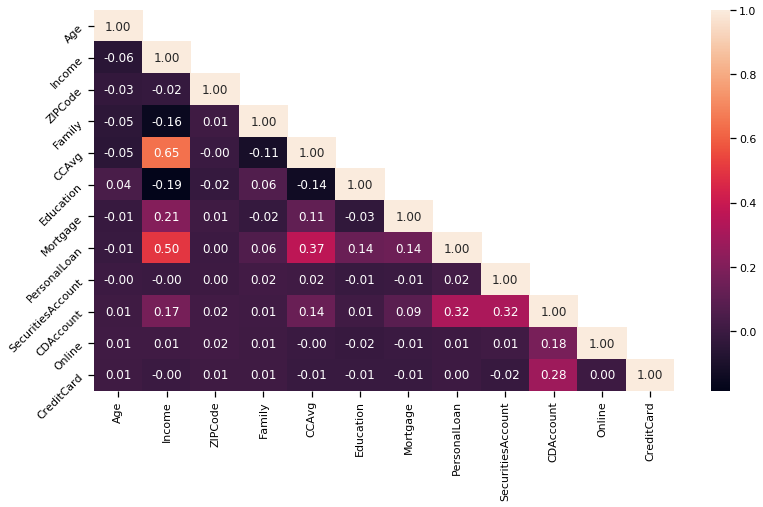

In [62]:
import matplotlib.pyplot as plt
corr= data.corr()
sns.set_context("notebook", font_scale=1.0,rc={"lines.linewidth" : 2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask,1)] = True
a=sns.heatmap(corr,mask=mask, annot=True, fmt=".2f")
rotx=a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty=a.set_yticklabels(a.get_yticklabels(), rotation=45)